In [30]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import linalg
import textwrap

In [32]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")
PLOTS_FOLDER = os.path.join(CURRENT_FOLDER, "plots")

In [33]:
synthetic_classification_results = pd.read_csv(os.path.join(RESULTS_FOLDER, "synthetic_classification_results.csv"))
original_classification_results = pd.read_csv(os.path.join(RESULTS_FOLDER, "original_classification_results.csv"))

In [51]:
original_classification_results

,dataset_name,model_name,accuracy,balanced_accuracy,F1
0,adult_small,DummyClassifier,0.754316,0.500000,0.000000
1,adult_small,GradientBoostingClassifier,0.821580,0.724641,0.595270
2,adult_small,LGBMClassifier,0.821846,0.729647,0.601988
3,adult_small,XGBClassifier,0.819522,0.731296,0.602980
4,adult_small,RandomForestClassifier,0.816202,0.726908,0.595794
5,adult_small,LinearSVC,0.821912,0.699894,0.559316
6,adult_small,MLPClassifier,0.819323,0.735993,0.608771
7,adult_large,DummyClassifier,0.754316,0.500000,0.000000
8,adult_large,GradientBoostingClassifier,0.839044,0.747243,0.633726
9,adult_large,LGBMClassifier,0.837118,0.749065,0.634698


In [34]:
adult_small_data = synthetic_classification_results[synthetic_classification_results['dataset_name'] == 'adult_small']
adult_small_data_original = original_classification_results[original_classification_results['dataset_name'] == 'adult_small']

In [35]:
adult_small_data

,experiment_id,dataset_name,dataset_index,query,epsilon,MCMC_algorithm,model_name,accuracy,balanced_accuracy,F1
0,JBCU751K,adult_small,0.0,[],0.1,NUTS,DummyClassifier,0.754316,0.500000,0.000000
1,JBCU751K,adult_small,0.0,[],0.1,NUTS,GradientBoostingClassifier,0.780611,0.694204,0.540089
2,JBCU751K,adult_small,0.0,[],0.1,NUTS,LGBMClassifier,0.769987,0.689349,0.531385
3,JBCU751K,adult_small,0.0,[],0.1,NUTS,XGBClassifier,0.765073,0.681171,0.519163
4,JBCU751K,adult_small,0.0,[],0.1,NUTS,RandomForestClassifier,0.761155,0.660624,0.487826
...,...,...,...,...,...,...,...,...,...,...
28240,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,LGBMClassifier,0.811620,0.716673,0.580263
28241,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,XGBClassifier,0.811753,0.716669,0.580311
28242,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,RandomForestClassifier,0.811753,0.716761,0.580435
28243,0BMMT3SD,adult_small,NaN,"[['age', 'sex']]",8.0,NUTS,LinearSVC,0.816401,0.715285,0.580234


In [36]:
adult_small_data_original

,dataset_name,model_name,accuracy,balanced_accuracy,F1
0,adult_small,DummyClassifier,0.754316,0.500000,0.000000
1,adult_small,GradientBoostingClassifier,0.821580,0.724641,0.595270
2,adult_small,LGBMClassifier,0.821846,0.729647,0.601988
3,adult_small,XGBClassifier,0.819522,0.731296,0.602980
4,adult_small,RandomForestClassifier,0.816202,0.726908,0.595794
5,adult_small,LinearSVC,0.821912,0.699894,0.559316
6,adult_small,MLPClassifier,0.819323,0.735993,0.608771


In [75]:
best_accuracy = adult_small_data_original['accuracy'].max().item()
print(best_accuracy)
best_balanced_accuracy = adult_small_data_original['balanced_accuracy'].max().item()
print(best_balanced_accuracy)
best_F1 = adult_small_data_original['F1'].max().item()
print(best_F1)

0.8219123505976096
0.7359930529120671
0.6087706685837527


In [76]:
adult_small_data = pd.concat([adult_small_data, adult_small_data_original])

In [77]:
adult_small_data

,experiment_id,dataset_name,dataset_index,query,epsilon,MCMC_algorithm,model_name,accuracy,balanced_accuracy,F1
0,JBCU751K,adult_small,0.0,[],0.1,NUTS,DummyClassifier,0.754316,0.500000,0.000000
1,JBCU751K,adult_small,0.0,[],0.1,NUTS,GradientBoostingClassifier,0.780611,0.694204,0.540089
2,JBCU751K,adult_small,0.0,[],0.1,NUTS,LGBMClassifier,0.769987,0.689349,0.531385
3,JBCU751K,adult_small,0.0,[],0.1,NUTS,XGBClassifier,0.765073,0.681171,0.519163
4,JBCU751K,adult_small,0.0,[],0.1,NUTS,RandomForestClassifier,0.761155,0.660624,0.487826
...,...,...,...,...,...,...,...,...,...,...
2,NaN,adult_small,NaN,NaN,NaN,NaN,LGBMClassifier,0.821846,0.729647,0.601988
3,NaN,adult_small,NaN,NaN,NaN,NaN,XGBClassifier,0.819522,0.731296,0.602980
4,NaN,adult_small,NaN,NaN,NaN,NaN,RandomForestClassifier,0.816202,0.726908,0.595794
5,NaN,adult_small,NaN,NaN,NaN,NaN,LinearSVC,0.821912,0.699894,0.559316


/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

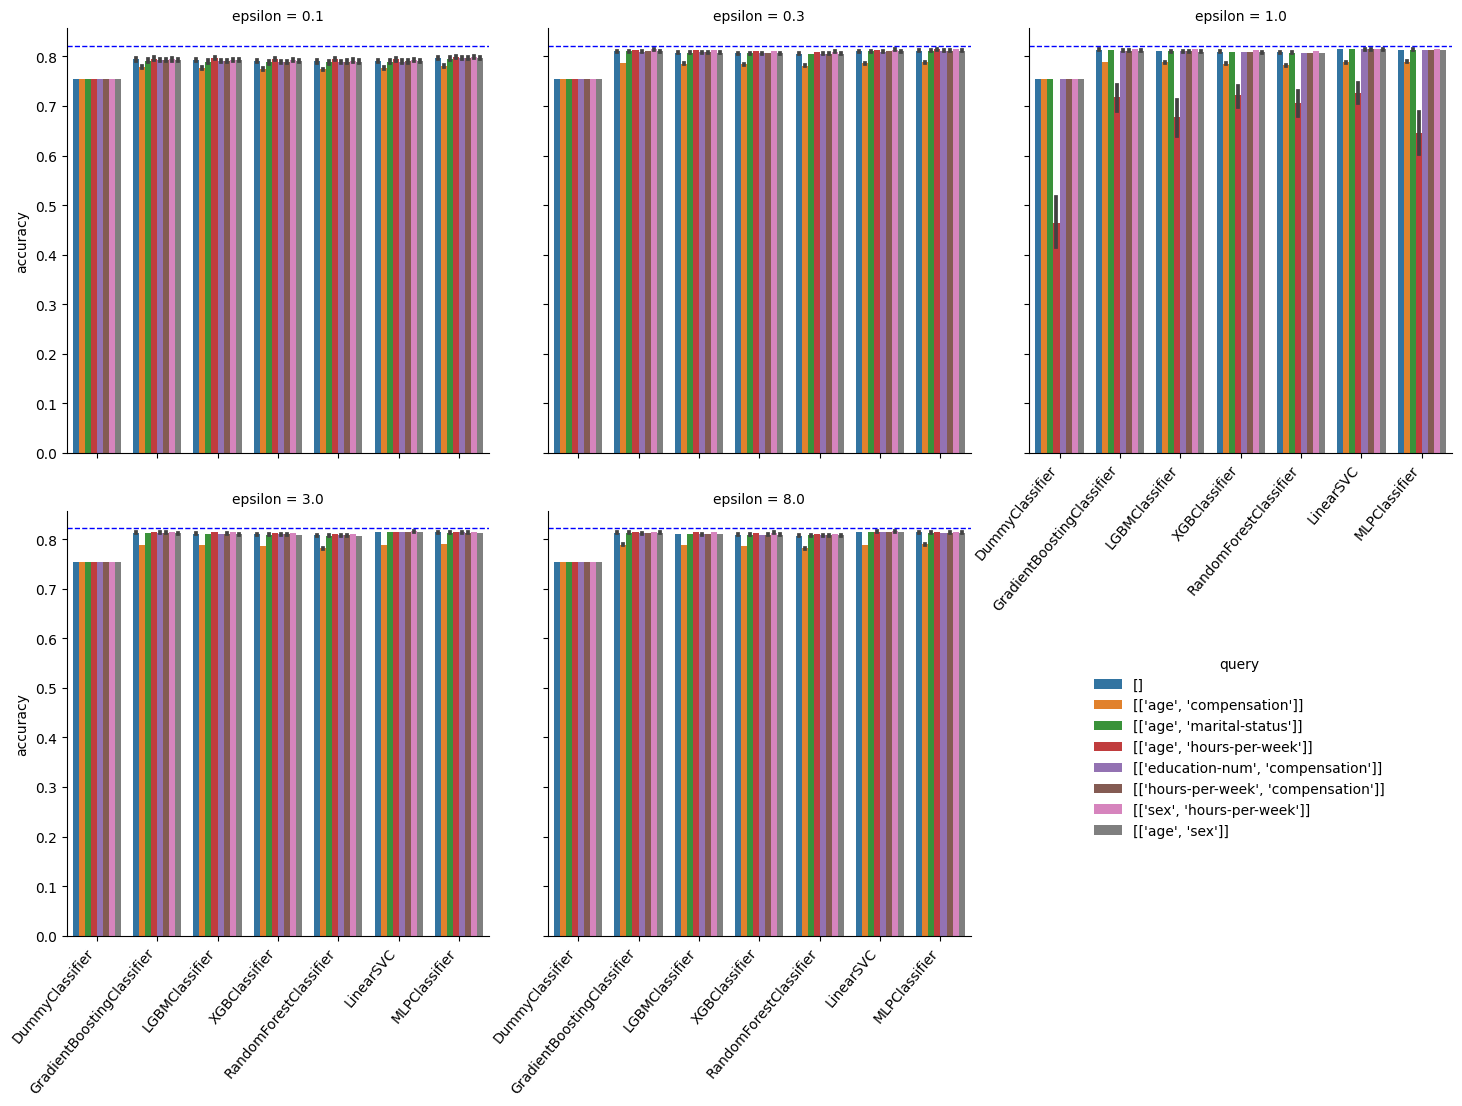

In [83]:
g = sns.catplot(data=adult_small_data, kind="bar", x="model_name", y="accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.60, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_adult_small_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

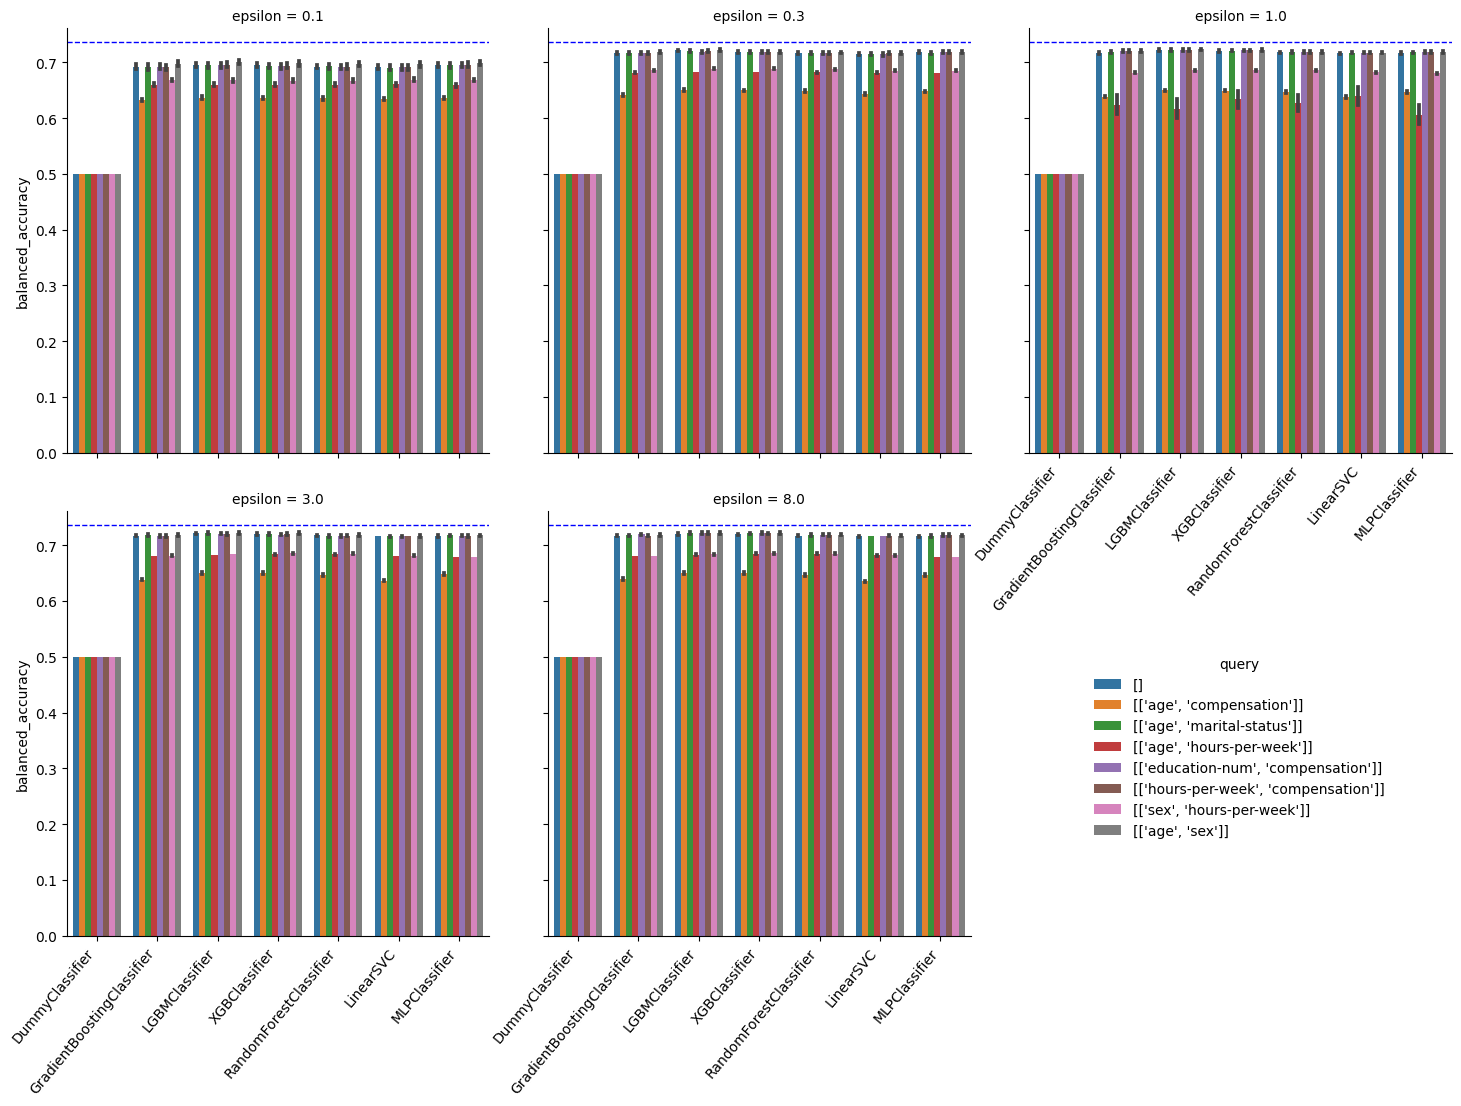

In [84]:
g = sns.catplot(data=adult_small_data, kind="bar", x="model_name", y="balanced_accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y=best_balanced_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.60, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_adult_small_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

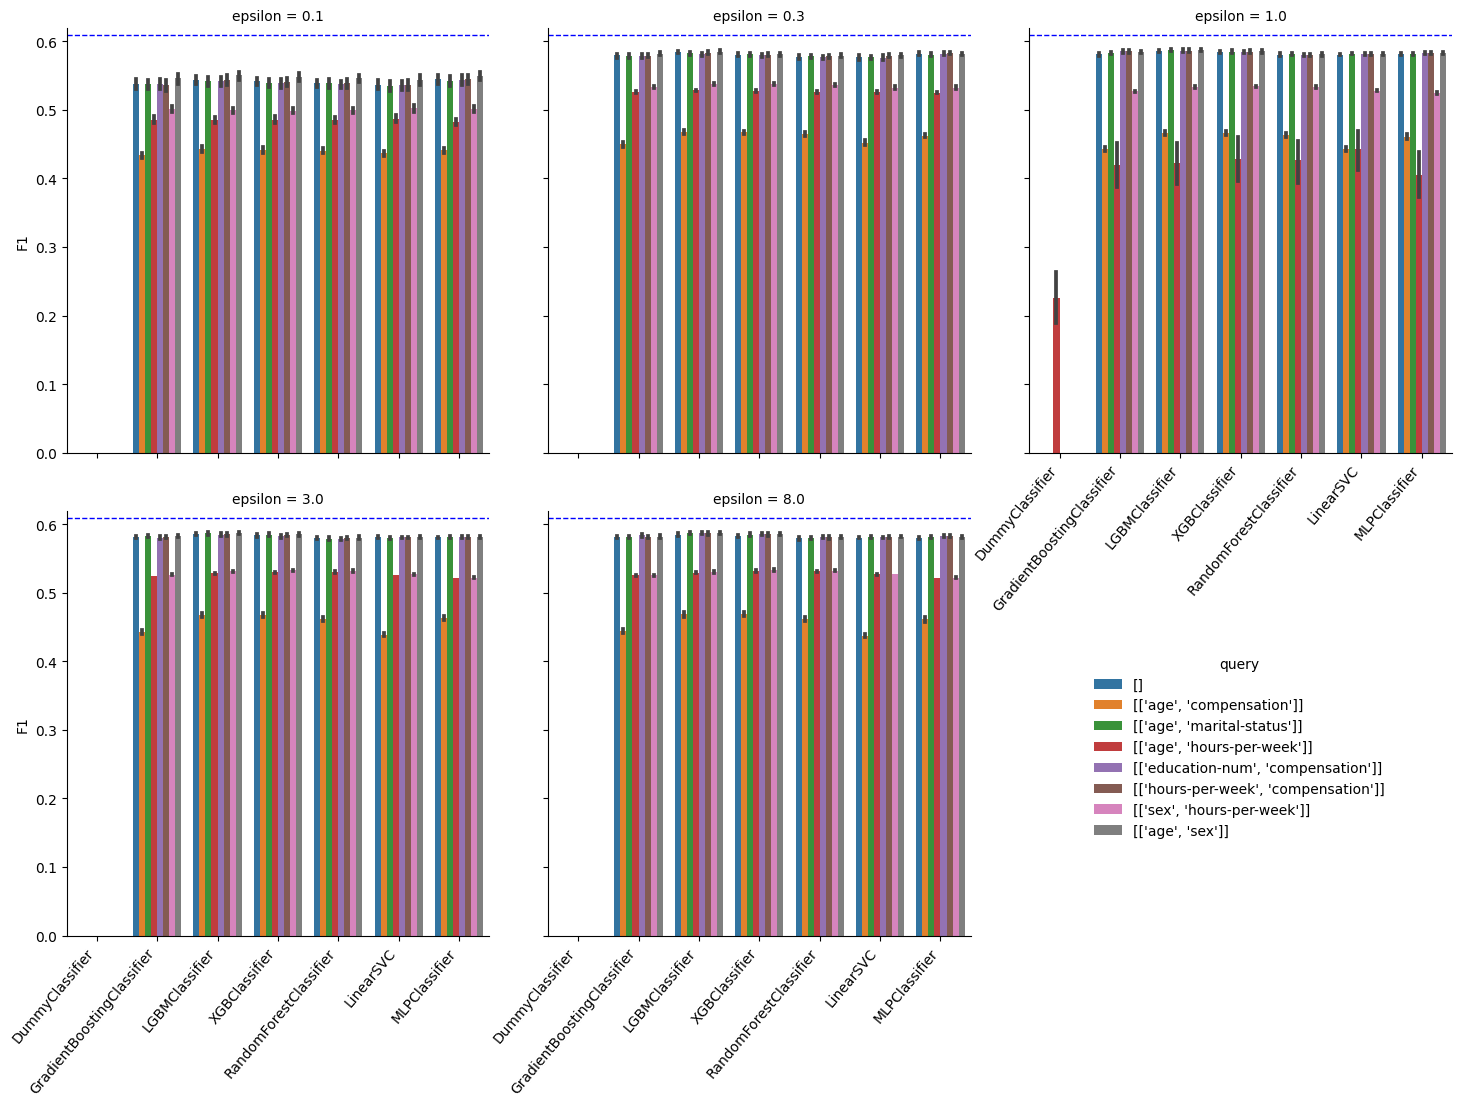

In [85]:
g = sns.catplot(data=adult_small_data, kind="bar", x="model_name", y="F1", hue="query", col="epsilon", col_wrap=3)
g.refline(y=best_F1, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.60, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_adult_small_f1.pdf"))

In [102]:
adult_large_data = synthetic_classification_results[synthetic_classification_results['dataset_name'] == 'adult_large']
adult_large_data_original = original_classification_results[original_classification_results['dataset_name'] == 'adult_large']

In [103]:
adult_large_data = pd.concat([adult_large_data, adult_large_data_original])

In [104]:
best_accuracy = adult_large_data_original['accuracy'].max().item()
print(best_accuracy)
best_balanced_accuracy = adult_large_data_original['balanced_accuracy'].max().item()
print(best_balanced_accuracy)
best_F1 = adult_large_data_original['F1'].max().item()
print(best_F1)

0.8390438247011952
0.7490645222687476
0.63469843633656


/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

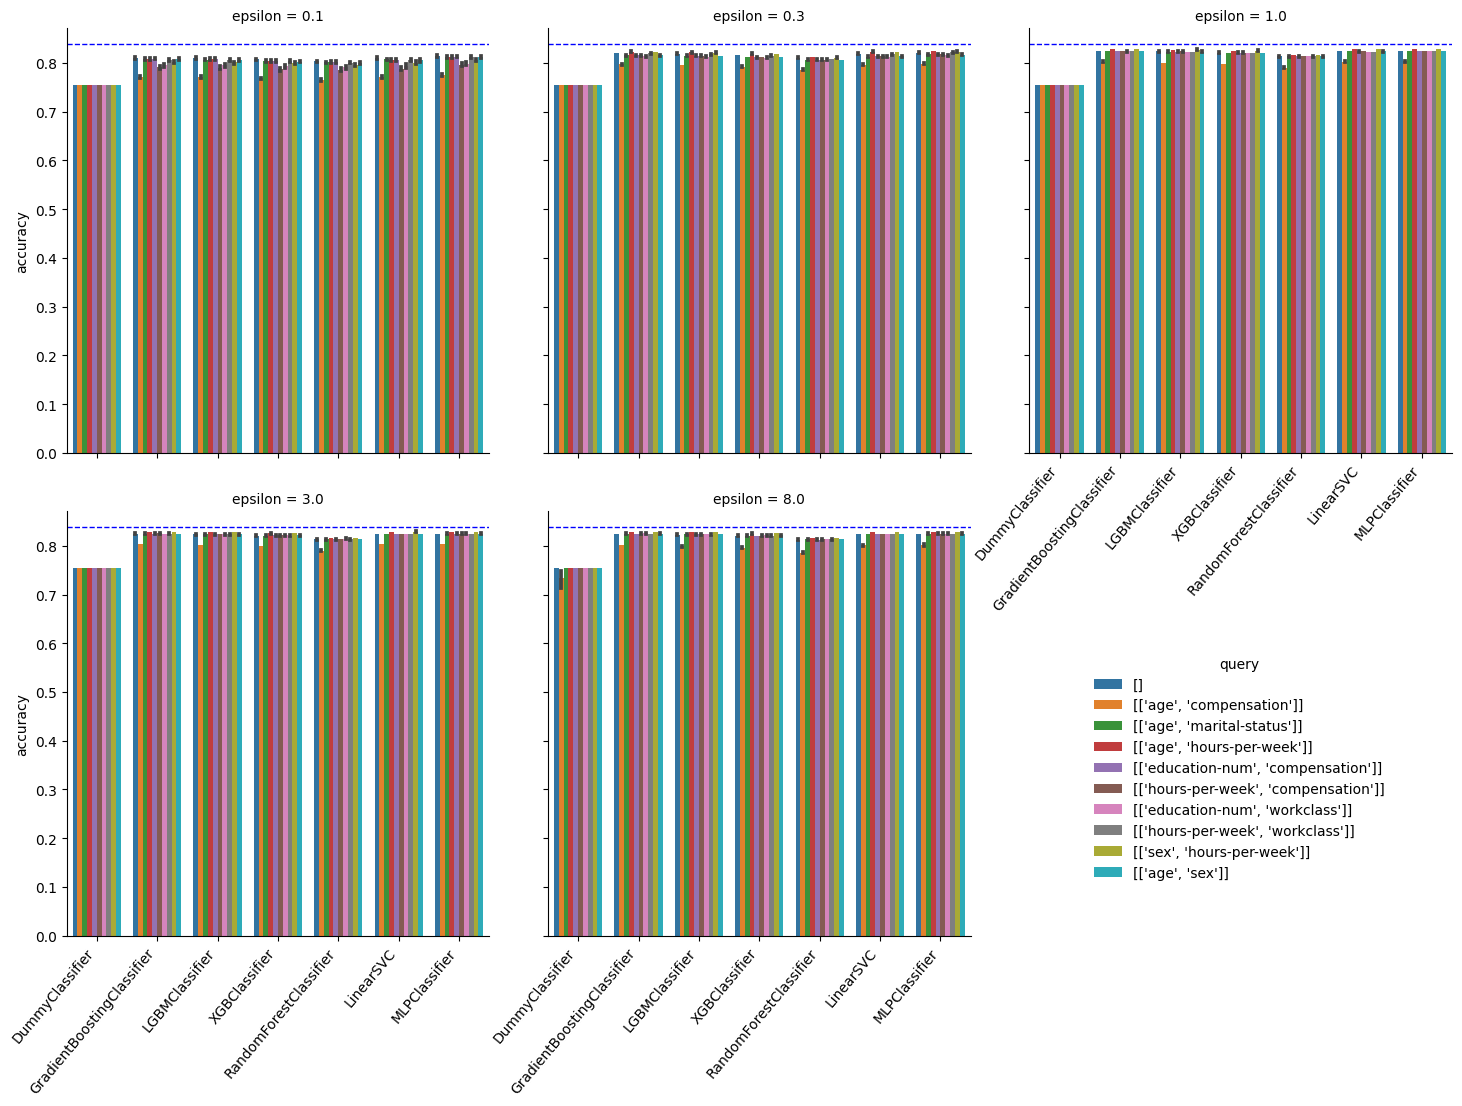

In [105]:
g = sns.catplot(data=adult_large_data, kind="bar", x="model_name", y="accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.60, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_adult_large_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

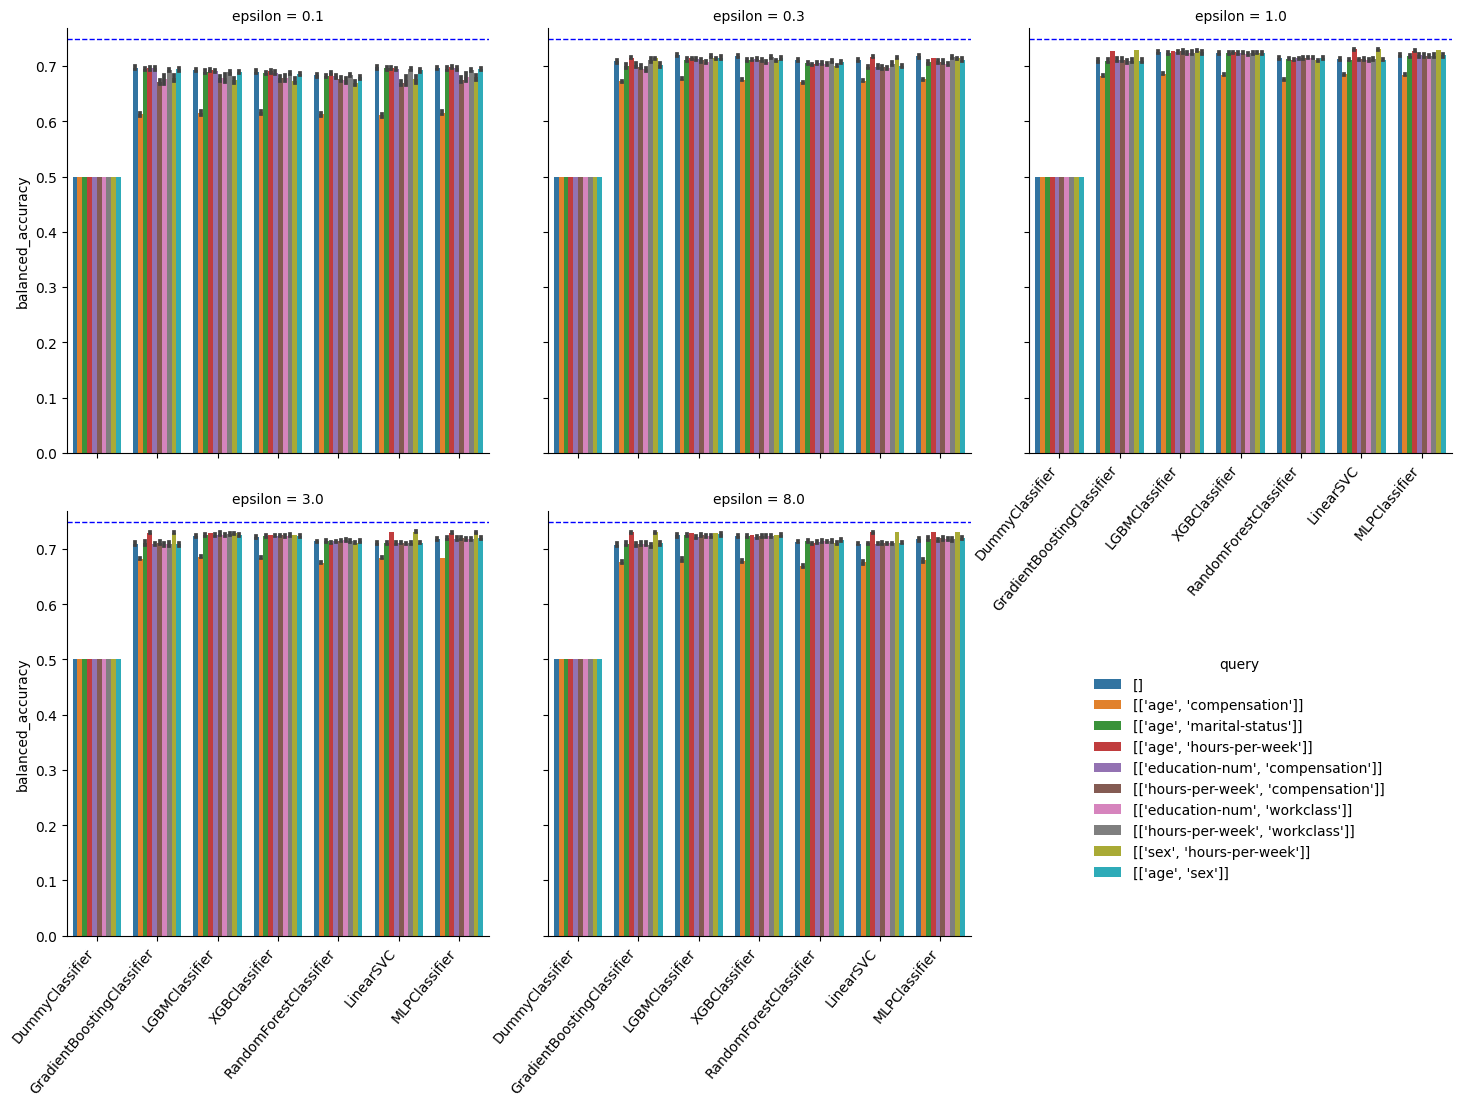

In [106]:
g = sns.catplot(data=adult_large_data, kind="bar", x="model_name", y="balanced_accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y=best_balanced_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.60, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_adult_large_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

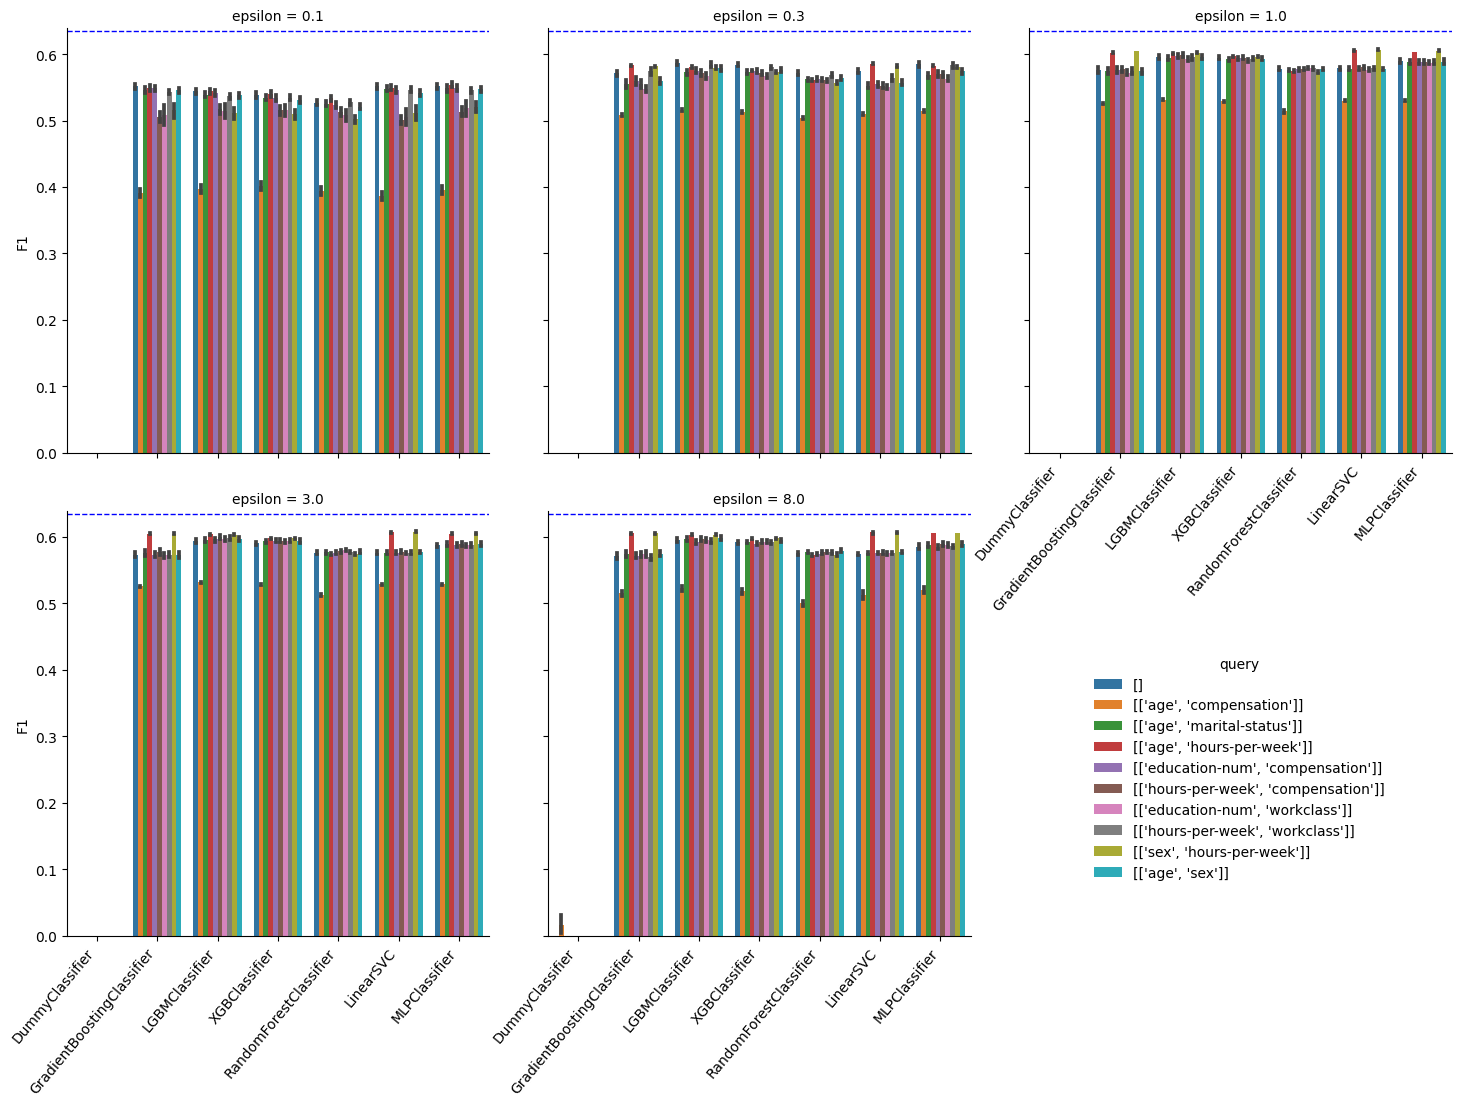

In [107]:
g = sns.catplot(data=adult_large_data, kind="bar", x="model_name", y="F1", hue="query", col="epsilon", col_wrap=3)
g.refline(y=best_F1, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.60, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_adult_large_f1.pdf"))

In [108]:
binary3d_data = synthetic_classification_results[synthetic_classification_results['dataset_name'] == 'binary3d']
binary3d_data_original = original_classification_results[original_classification_results['dataset_name'] == 'binary3d']

In [109]:
binary3d_data = pd.concat([binary3d_data, binary3d_data_original])

In [110]:
best_accuracy = binary3d_data_original['accuracy'].max().item()
print(best_accuracy)
best_balanced_accuracy = binary3d_data_original['balanced_accuracy'].max().item()
print(best_balanced_accuracy)
best_F1 = binary3d_data_original['F1'].max().item()
print(best_F1)

0.61612
0.5596461098425747
0.762468133554439


/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

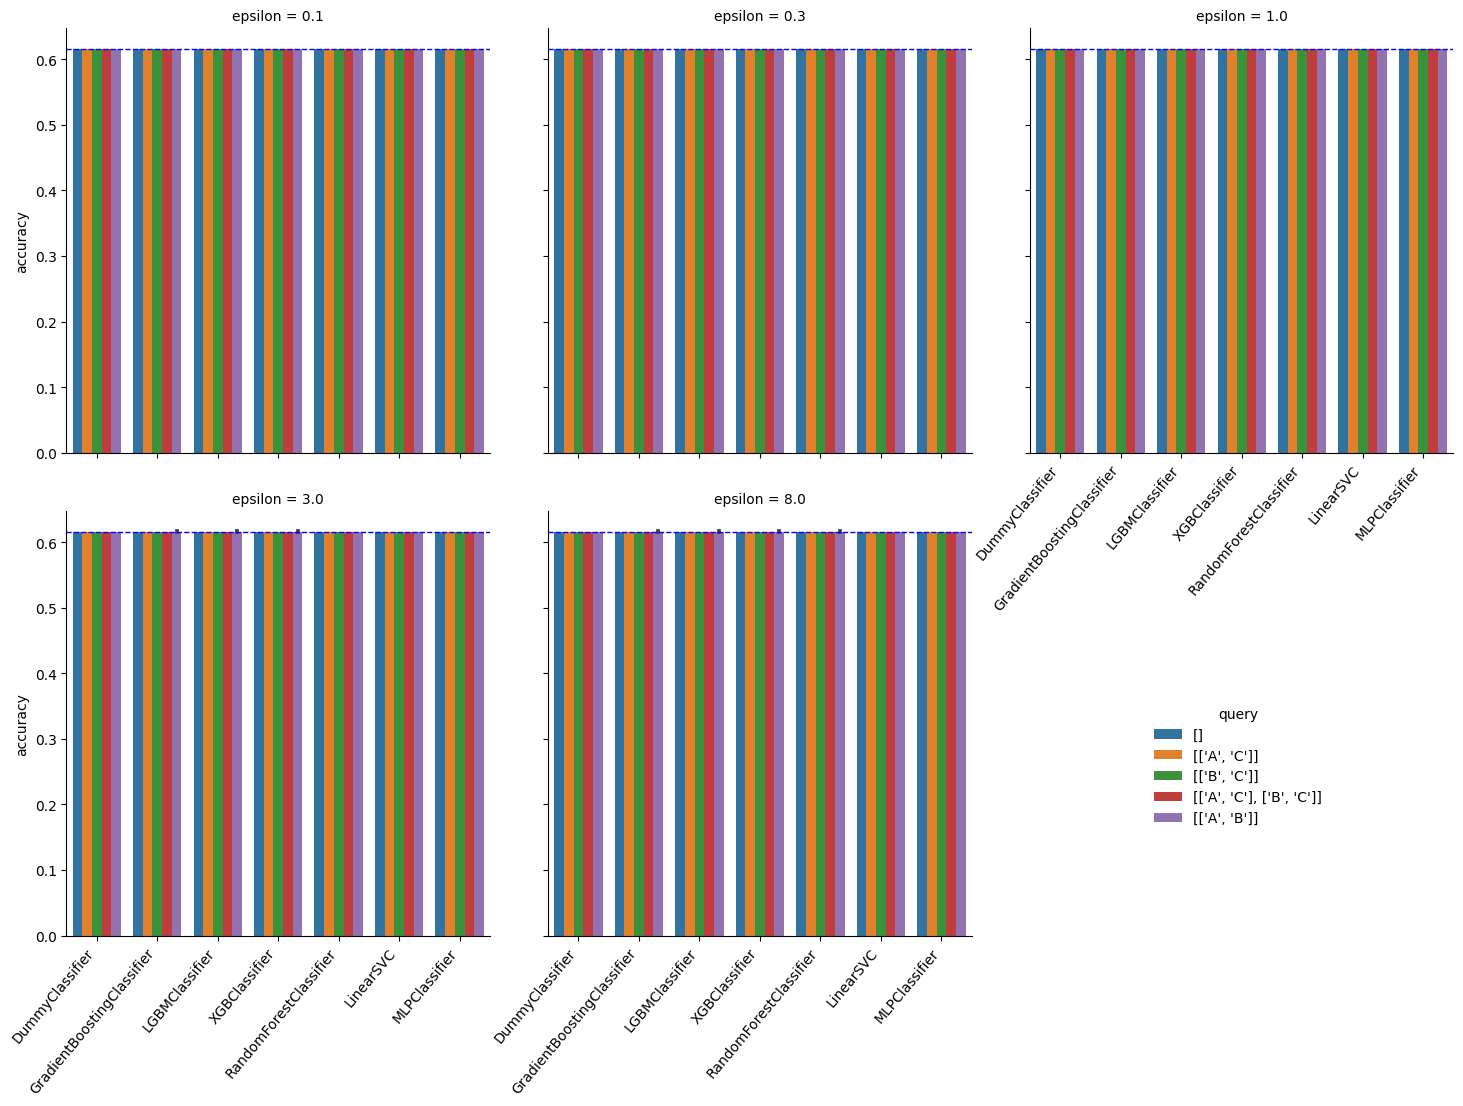

In [118]:
g = sns.catplot(data=binary3d_data, kind="bar", x="model_name", y="accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.68, .30))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_binary3d_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

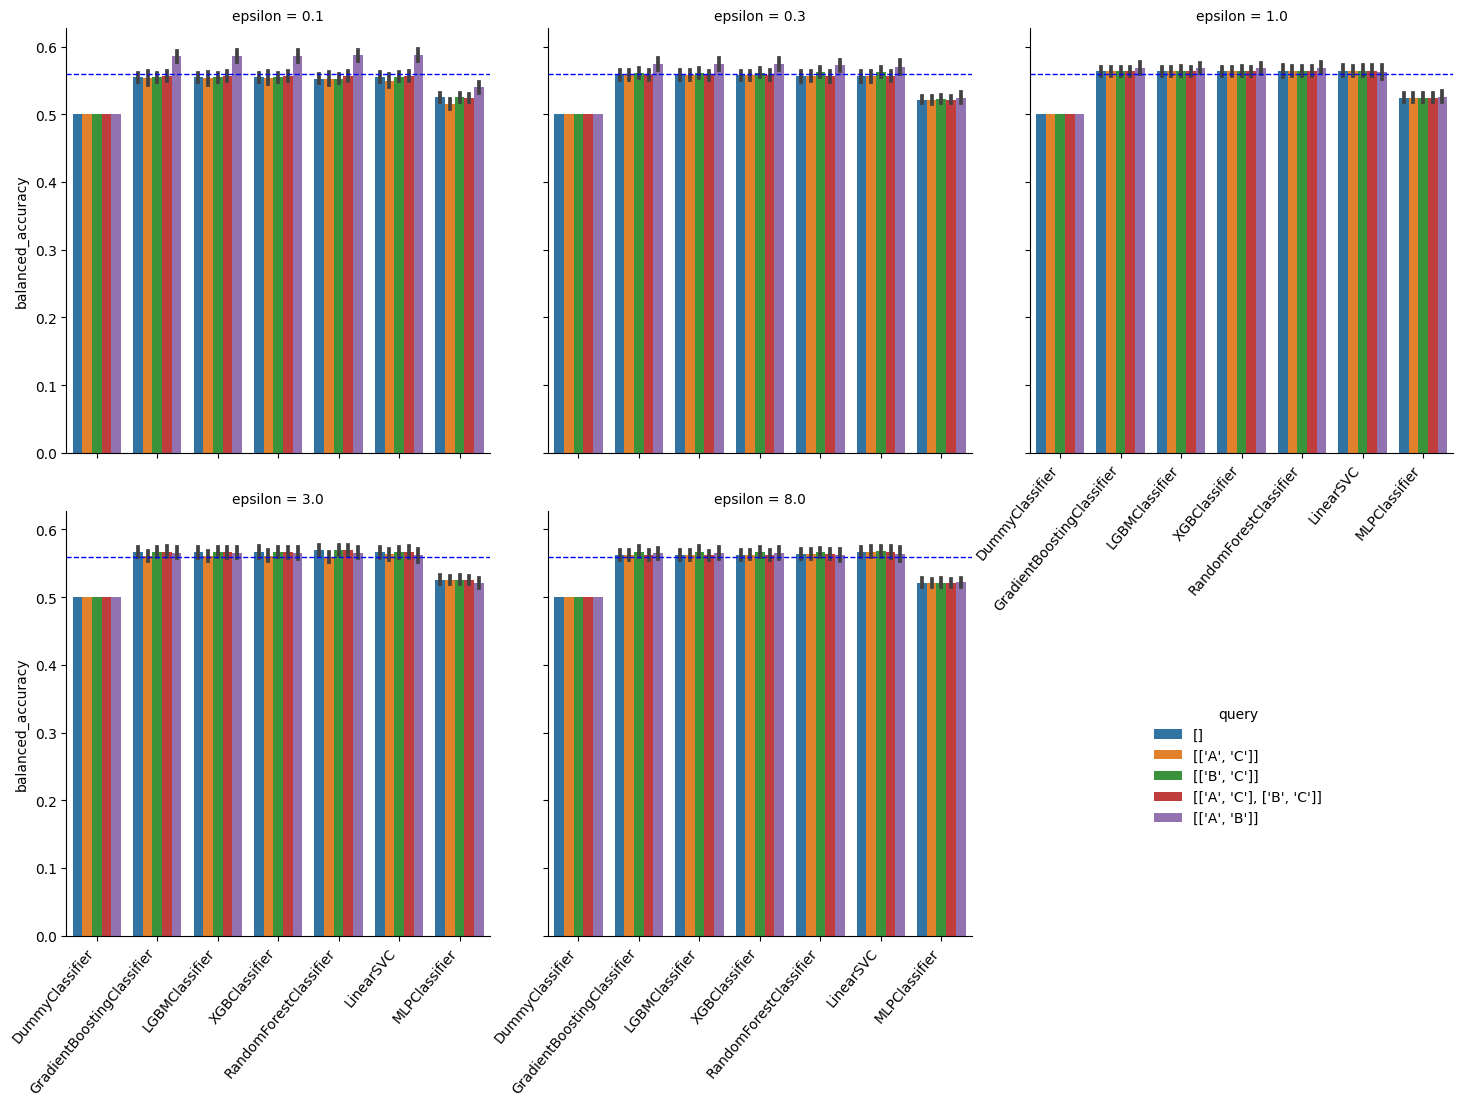

In [119]:
g = sns.catplot(data=binary3d_data, kind="bar", x="model_name", y="balanced_accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_balanced_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.68, .30))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_binary3d_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

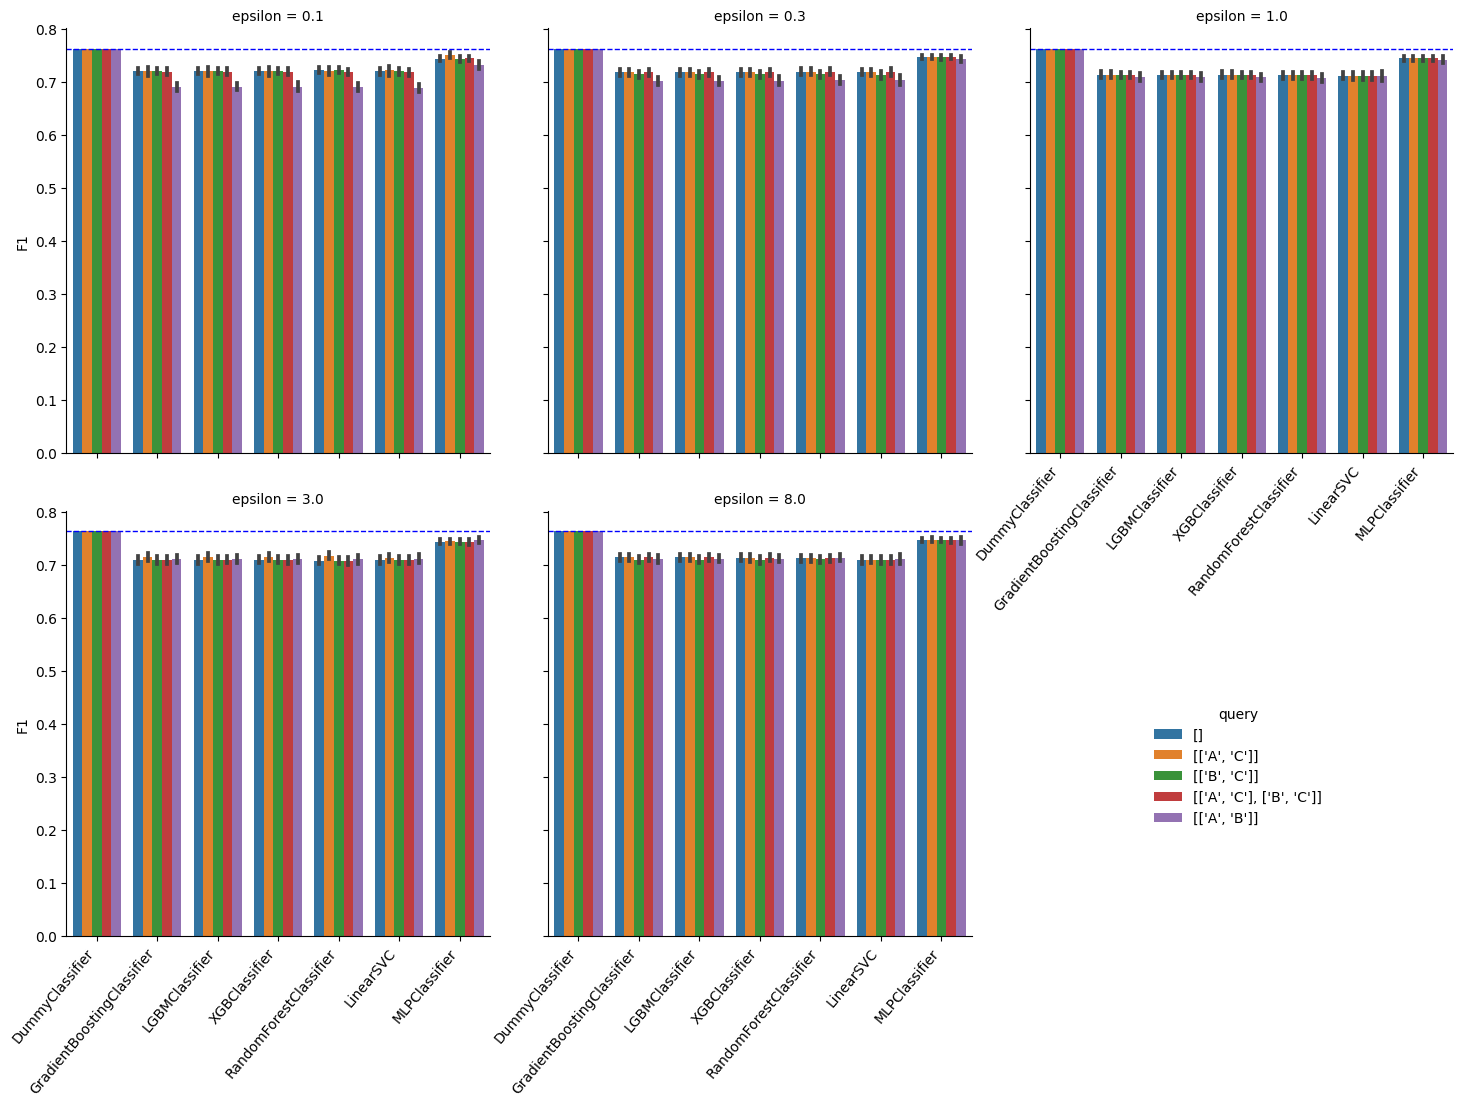

In [120]:
g = sns.catplot(data=binary3d_data, kind="bar", x="model_name", y="F1", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_F1, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.68, .30))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_binary3d_F1.pdf"))

In [121]:
binary4d_data = synthetic_classification_results[synthetic_classification_results['dataset_name'] == 'binary4d']
binary4d_data_original = original_classification_results[original_classification_results['dataset_name'] == 'binary4d']

In [122]:
binary4d_data = pd.concat([binary4d_data, binary4d_data_original])

In [123]:
best_accuracy = binary4d_data_original['accuracy'].max().item()
print(best_accuracy)
best_balanced_accuracy = binary4d_data_original['balanced_accuracy'].max().item()
print(best_balanced_accuracy)
best_F1 = binary4d_data_original['F1'].max().item()
print(best_F1)

0.76686
0.6862011706663631
0.8679330722032287


/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

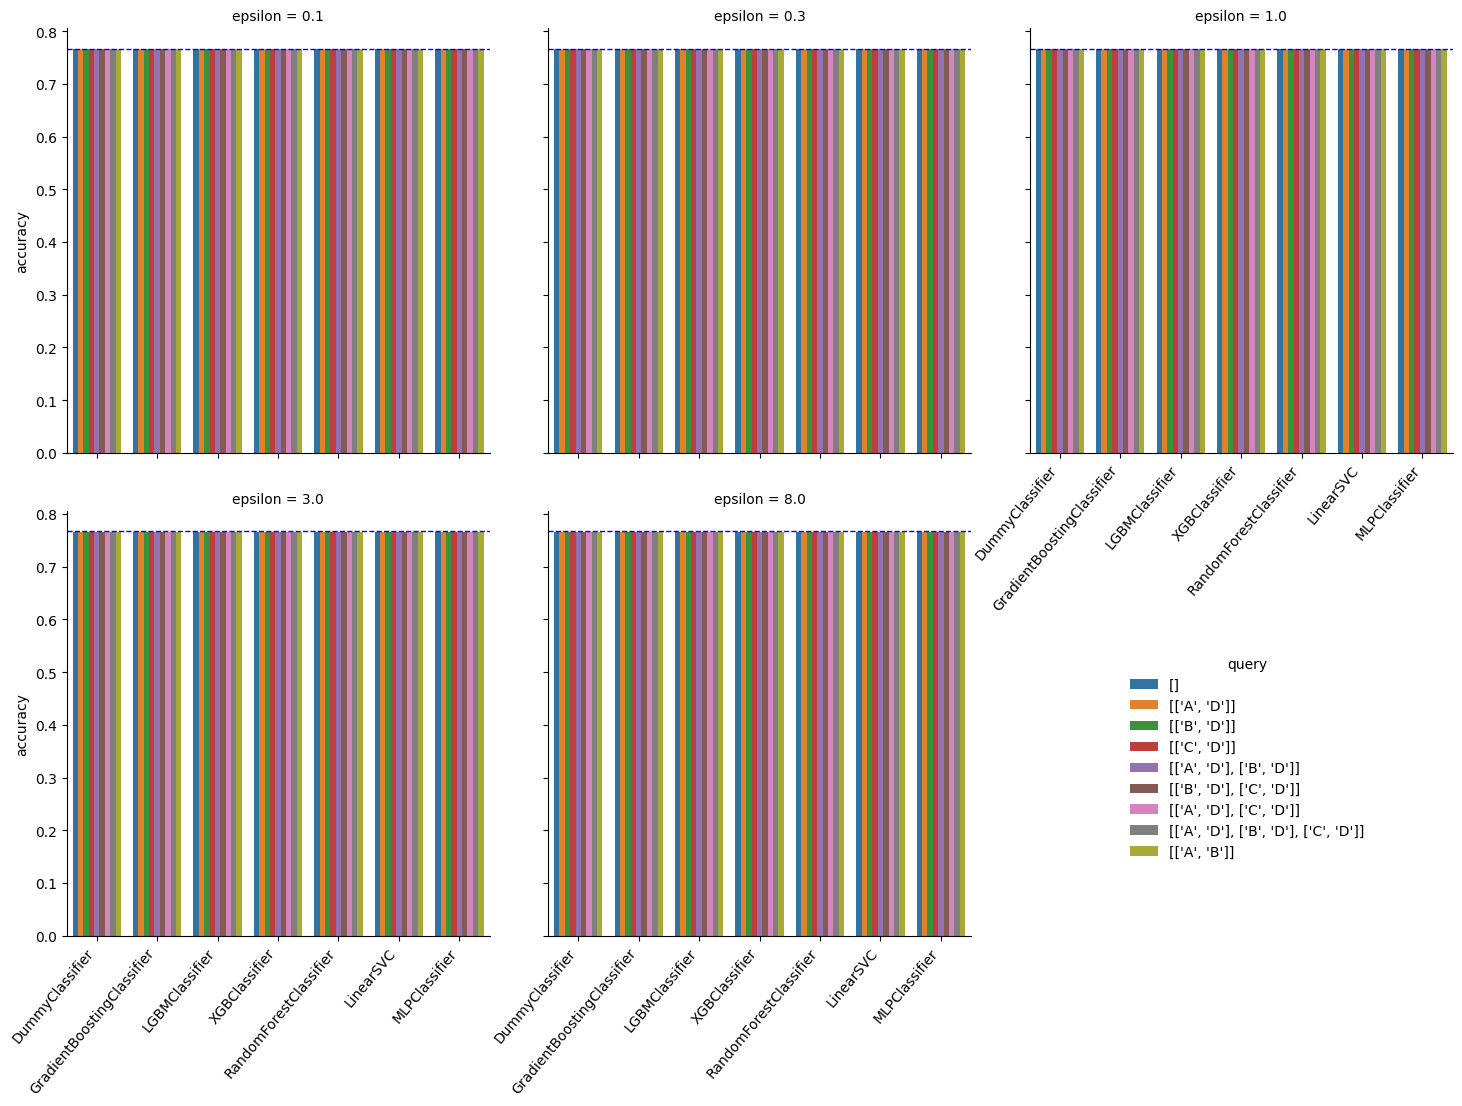

In [129]:
g = sns.catplot(data=binary4d_data, kind="bar", x="model_name", y="accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.64, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_binary4d_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

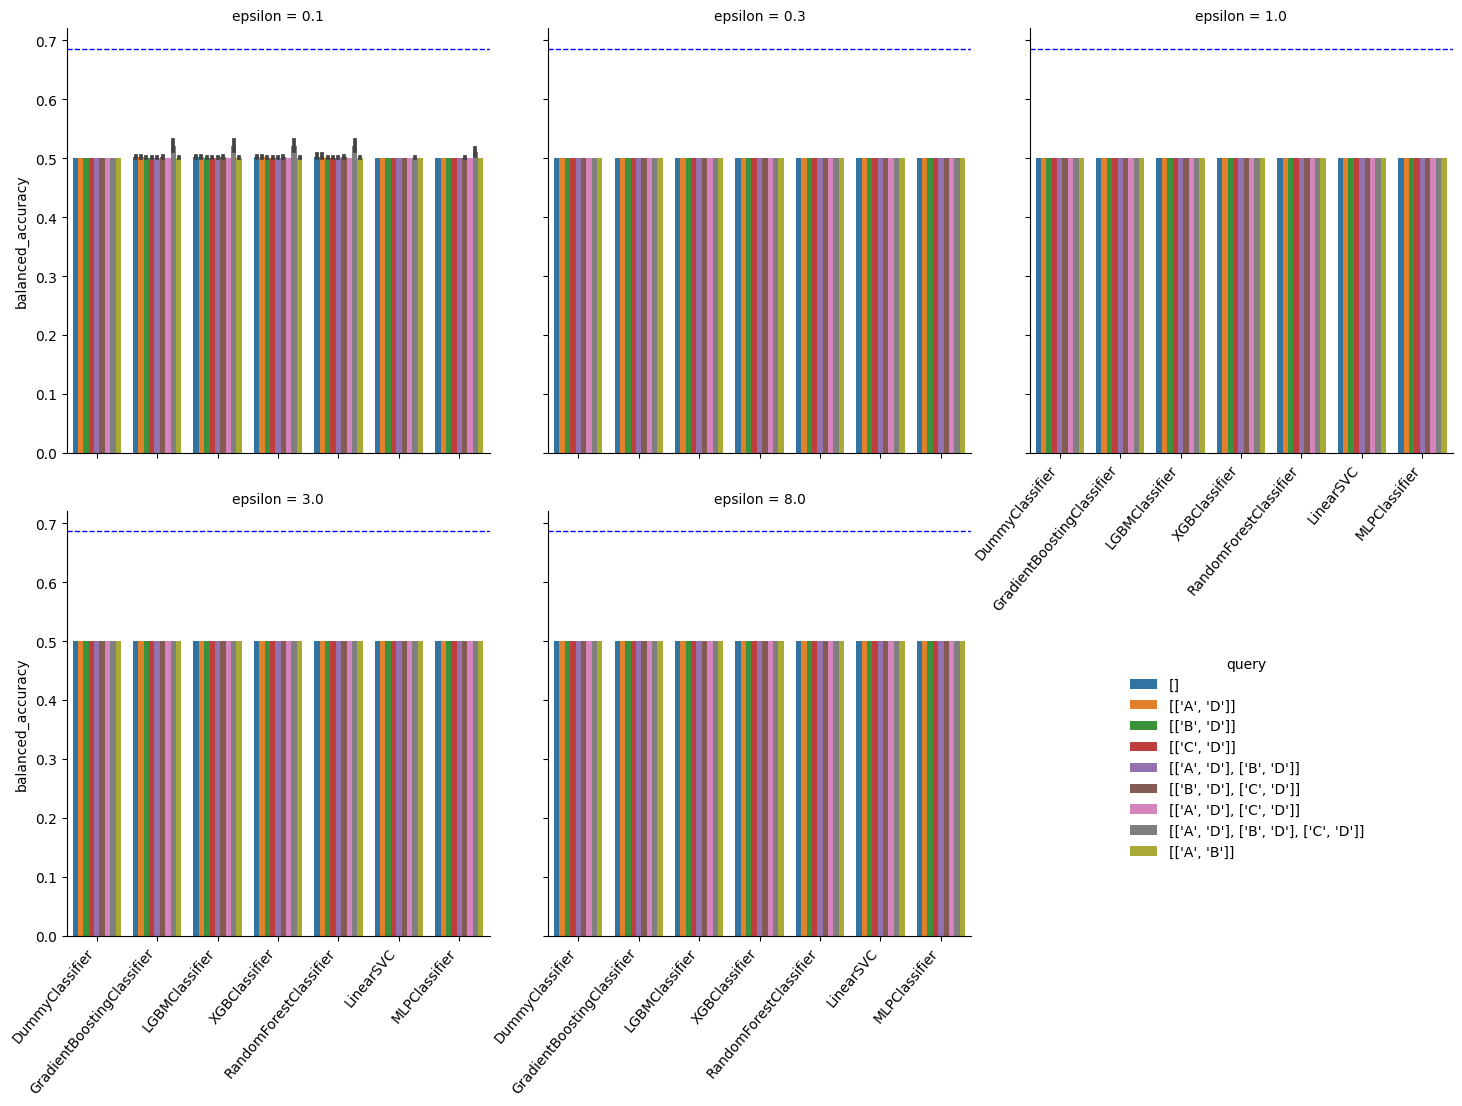

In [130]:
g = sns.catplot(data=binary4d_data, kind="bar", x="model_name", y="balanced_accuracy", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_balanced_accuracy, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.64, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_binary4d_balanced_accuracy.pdf"))

/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarlehti/projects/gradu/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/local/jarl

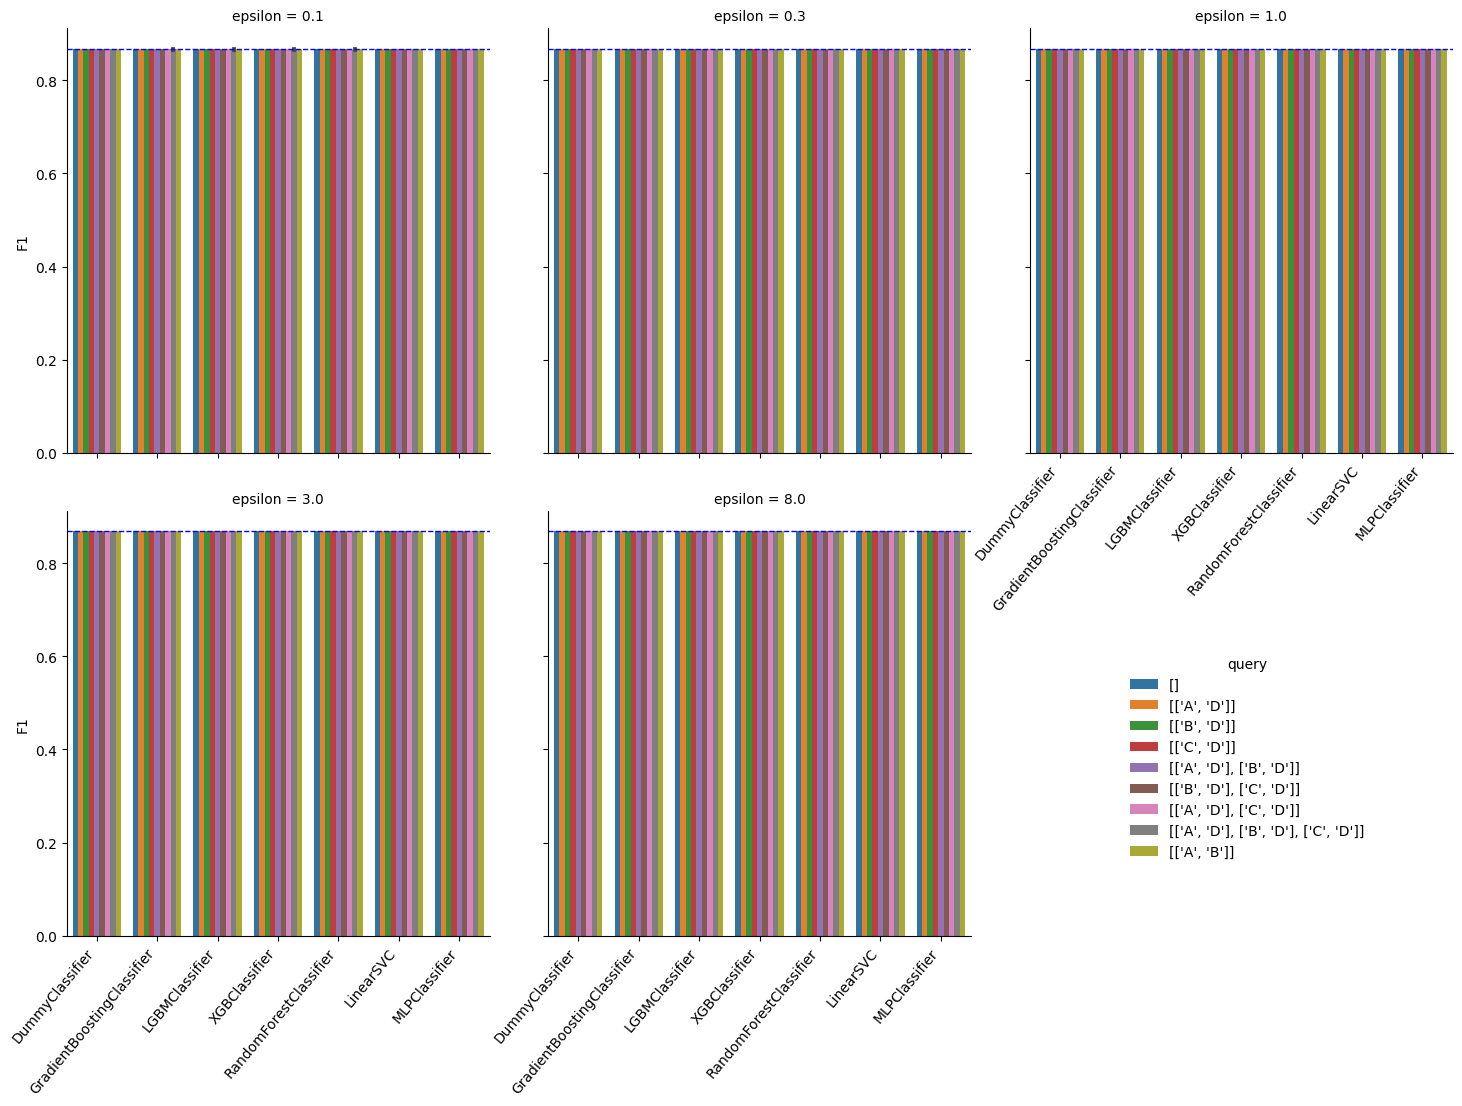

In [131]:
g = sns.catplot(data=binary4d_data, kind="bar", x="model_name", y="F1", hue="query", col="epsilon", col_wrap=3)
g.refline(y = best_F1, color = "blue", lw = 1)
g.set_xticklabels(rotation=50, ha="right")
g.set(xlabel=None)
sns.move_legend(g, "upper left", bbox_to_anchor=(.64, .35))
plt.show()
g.savefig(os.path.join(PLOTS_FOLDER, "synthetic_classification_results_binary4d_F1.pdf"))